### Project by: 
##### Pavithra Rajan B190632CS
##### Lenoah Chacko B190657CS
##### Darshan Jayachandran B190392CS

#### A machine learning project with the goal of predicting the spread of Dengue fever across the globe. Specifically, the aim of the project is to predict the next pandemic of the disease before it occurs in San Juan, Puerto Rico or Iquitos, Peru. Dengue fever is primarily transmitted through mosquitos carrying the disease, and it is therefore highly dependent on climate and vegetation factors.

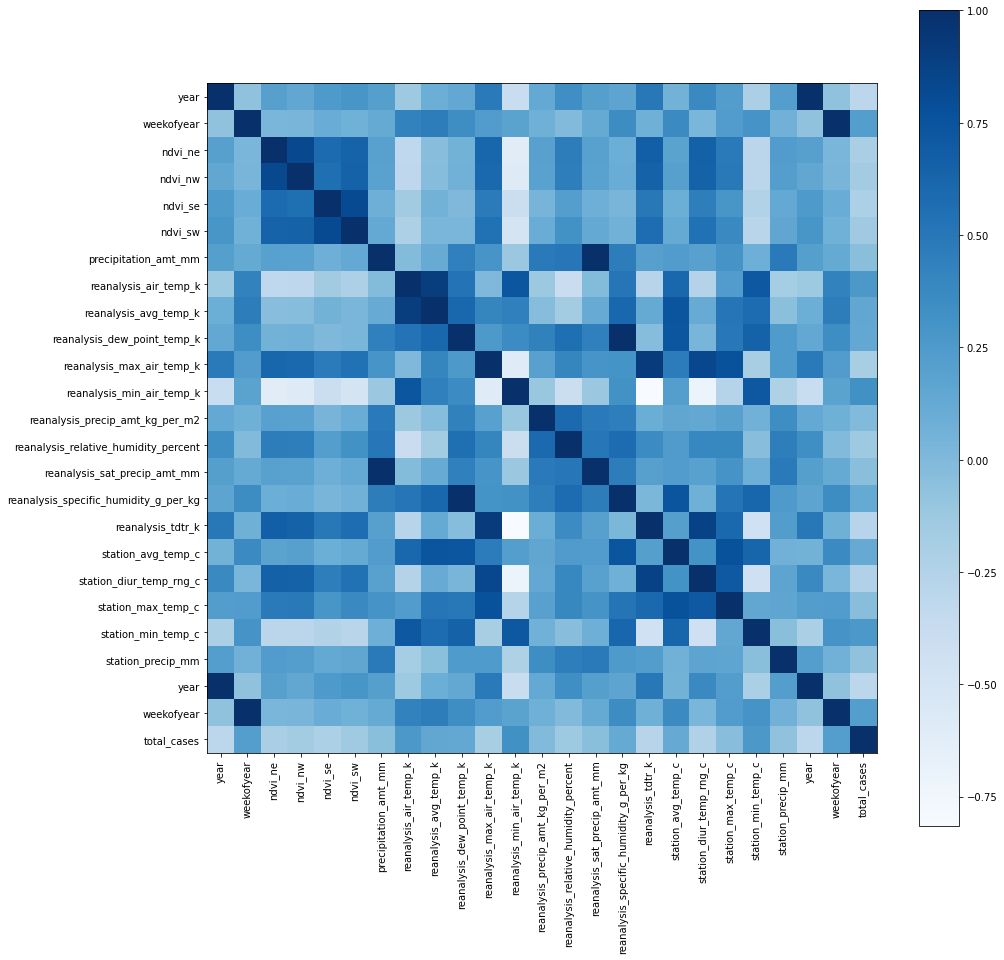

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
features = pd.read_csv("Training_Data_Features.csv")
labels = pd.read_csv("Training_Data_Labels.csv")


combine=pd.concat([features, labels], axis=1, join='inner')

#We remove NaN values and fill them with previous value in every column feature.
Data = combine.apply(lambda x: x.fillna(method='ffill'))
Data.pop('week_start_date')

# Kelvin to celsius conversion
c=["reanalysis_air_temp_k", "reanalysis_avg_temp_k","reanalysis_dew_point_temp_k",
            "reanalysis_max_air_temp_k","reanalysis_min_air_temp_k"]
#conversion 
for i in c:
    Data[i] = Data[i] - 273.15

#correlation matrix
corr=Data.corr()

import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(15, 15))
plt.imshow(corr, cmap='Blues', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns,rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);
plt.show()



In [2]:
Data.head(10) #display top 10 rows

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city,year,weekofyear,total_cases
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,24.422857,24.592857,...,2.628571,25.442857,6.900000,29.4,20.0,16.0,sj,1990,18,4
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,25.061429,25.292857,...,2.371429,26.714286,6.371429,31.7,22.2,8.6,sj,1990,19,5
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,25.631429,25.728571,...,2.300000,26.714286,6.485714,32.2,22.8,41.4,sj,1990,20,4
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,25.837143,26.078571,...,2.428571,27.471429,6.771429,33.3,23.3,4.0,sj,1990,21,3
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,26.368571,26.514286,...,3.014286,28.942857,9.371429,35.0,23.9,5.8,sj,1990,22,6
5,sj,1990,23,0.196200,0.174850,0.254314,0.181743,9.58,26.480000,26.614286,...,2.100000,28.114286,6.942857,34.4,23.9,39.1,sj,1990,23,2
6,sj,1990,24,0.112900,0.092800,0.205071,0.210271,3.48,26.057143,26.071429,...,2.042857,27.414286,6.771429,32.2,23.3,29.7,sj,1990,24,4
7,sj,1990,25,0.072500,0.072500,0.151471,0.133029,151.12,26.441429,26.378571,...,1.571429,28.371429,7.685714,33.9,22.8,21.1,sj,1990,25,5
8,sj,1990,26,0.102450,0.146175,0.125571,0.123600,19.32,26.428571,26.407143,...,1.885714,28.328571,7.385714,33.9,22.8,21.1,sj,1990,26,10
9,sj,1990,27,0.102450,0.121550,0.160683,0.202567,14.41,27.004286,27.128571,...,2.014286,28.328571,6.514286,33.9,24.4,1.1,sj,1990,27,6


### Removing attributes based on variance

In [3]:
for i in list(Data):
    print(i,(40-len(i))*" ","-->",Data[i].var())  #display the variance

city                                      --> Series([], dtype: float64)
year                                      --> year    29.24986
year    29.24986
dtype: float64
weekofyear                                --> weekofyear    225.583493
weekofyear    225.583493
dtype: float64
ndvi_ne                                   --> 0.019189678045667725
ndvi_nw                                   --> 0.014294789737666872
ndvi_se                                   --> 0.005536768213180817
ndvi_sw                                   --> 0.006987651634564899
precipitation_amt_mm                      --> 1916.6287044248636
reanalysis_air_temp_k                     --> 1.8549088701802805
reanalysis_avg_temp_k                     --> 1.594351390373012
reanalysis_dew_point_temp_k               --> 2.3333385259069566
reanalysis_max_air_temp_k                 --> 10.452485253578029
reanalysis_min_air_temp_k                 --> 6.5505184047052785
reanalysis_precip_amt_kg_per_m2           --> 1877.4173028932078

### station_precip_mm,reanalysis_precip_amt_kg_per_m2,precipitation_amt_mm are removed

In [4]:
Data.pop('station_precip_mm')
Data.pop('reanalysis_precip_amt_kg_per_m2')
Data.pop('precipitation_amt_mm')

0       12.42
1       22.82
2       34.54
3       15.36
4        7.52
        ...  
1451    55.30
1452    86.47
1453    58.94
1454    59.67
1455    63.22
Name: precipitation_amt_mm, Length: 1456, dtype: float64

In [5]:
Data['total_cases'].nlargest(10)

232    461
231    426
236    410
230    395
233    381
237    364
238    359
235    353
234    333
430    329
Name: total_cases, dtype: int64

### distplot() shows a histogram of a univariate distribution of observations. Here, we combine with a kdeplot for analysis of some features.KDE(kernal density estimate) depicts the data through a continuous probability density curve in one or more dimensions.

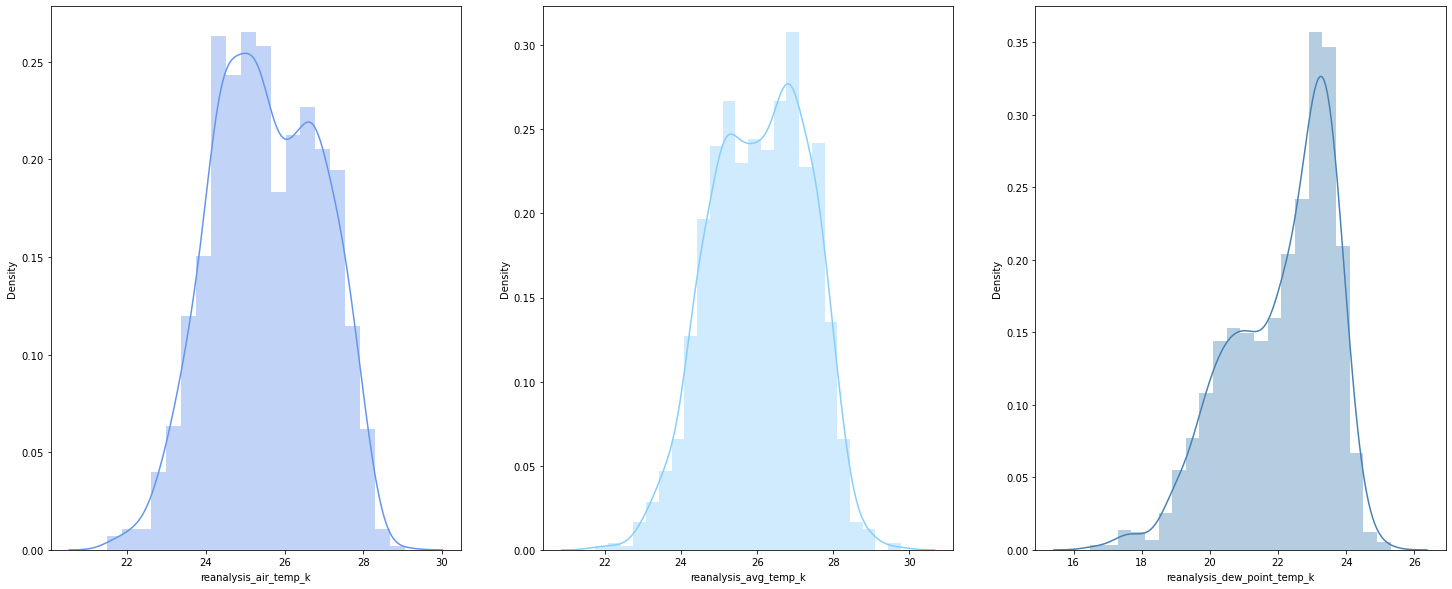

In [6]:
import seaborn as sns
plt.figure(figsize=(25,10))
plt.subplot(131)
sns.distplot(Data['reanalysis_air_temp_k'],kde=True,color='cornflowerblue')

plt.subplot(132)
sns.distplot(Data['reanalysis_avg_temp_k'],kde=True,color='lightskyblue')

plt.subplot(133)
sns.distplot(Data['reanalysis_dew_point_temp_k'],kde=True,color='steelblue')

plt.show()

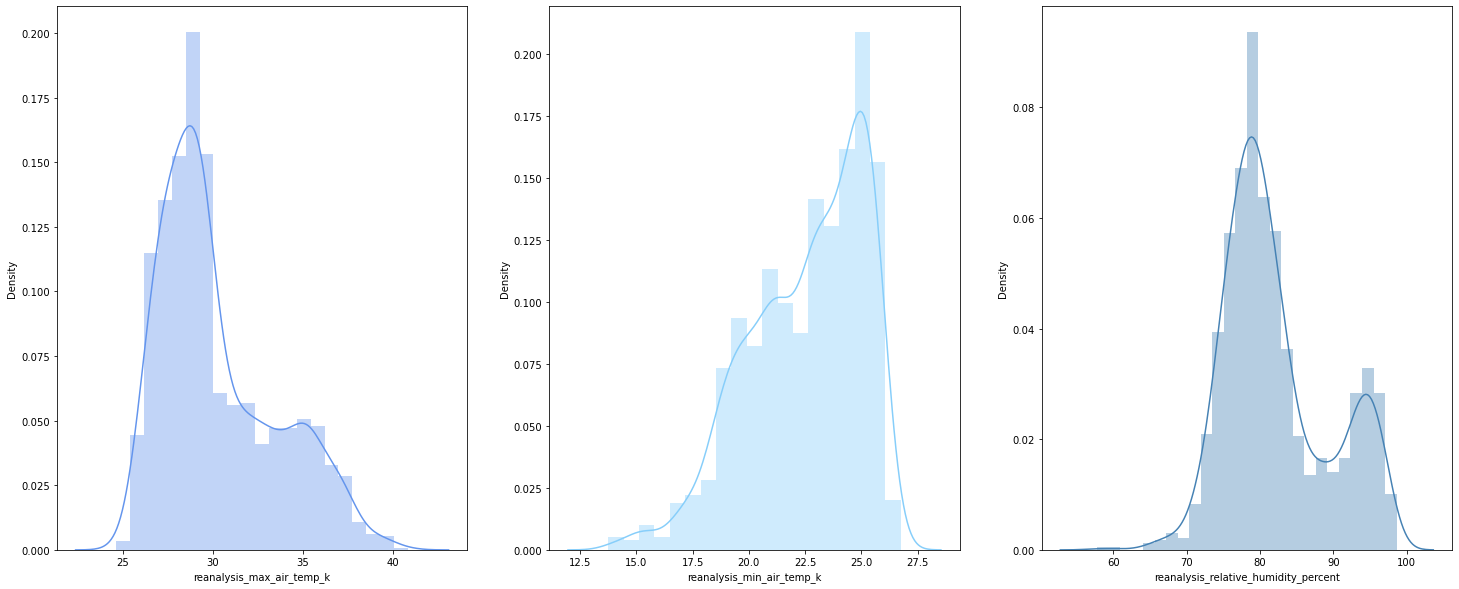

In [7]:
import seaborn as sns
plt.figure(figsize=(25,10))
plt.subplot(131)
sns.distplot(Data['reanalysis_max_air_temp_k'],kde=True,color='cornflowerblue')

plt.subplot(132)
sns.distplot(Data['reanalysis_min_air_temp_k'],kde=True,color='lightskyblue')

plt.subplot(133)
sns.distplot(Data['reanalysis_relative_humidity_percent'],kde=True,color='steelblue')

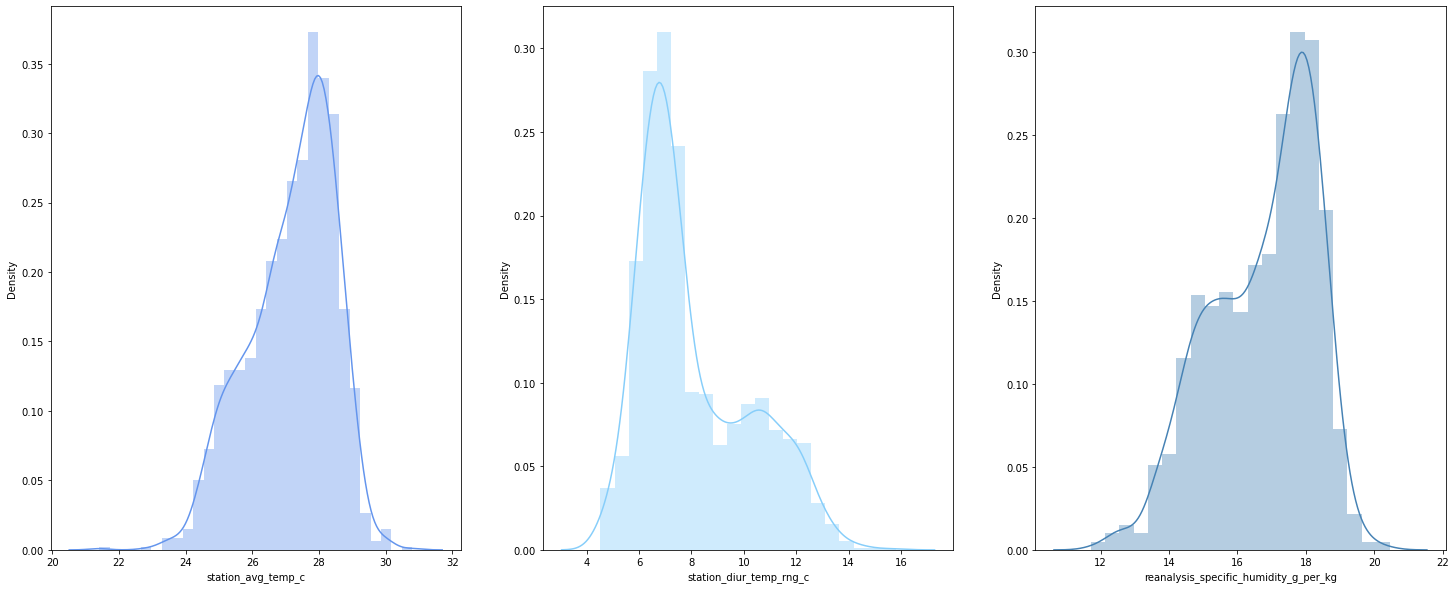

In [8]:
import seaborn as sns
plt.figure(figsize=(25,10))
plt.subplot(131)
sns.distplot(Data['station_avg_temp_c'],kde=True,color='cornflowerblue')

plt.subplot(132)
sns.distplot(Data['station_diur_temp_rng_c'],kde=True,color='lightskyblue')

plt.subplot(133)
sns.distplot(Data['reanalysis_specific_humidity_g_per_kg'],kde=True,color='steelblue')

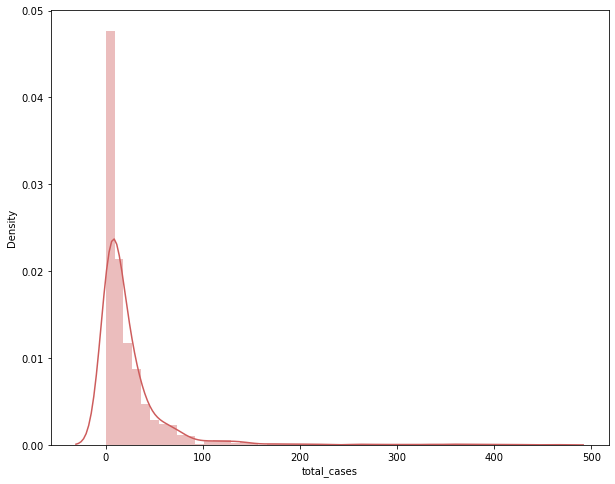

In [9]:
plt.figure(figsize=(10,8))
sns.distplot(Data['total_cases'],kde=True,color='indianred')

## Splitting Processed Dataset based on city (San Juan or Iquitos)


In [10]:
Data=Data.T.drop_duplicates().T
sj = Data[Data.city =="sj"]
iq = Data[Data.city =="iq"]
#fill NaN of total cases with mean
iq['total_cases'].fillna((iq['total_cases'].mean()), inplace=True)
sj['total_cases'].fillna((sj['total_cases'].mean()), inplace=True)

Text(0.5, 1.0, 'Iquitos cases')

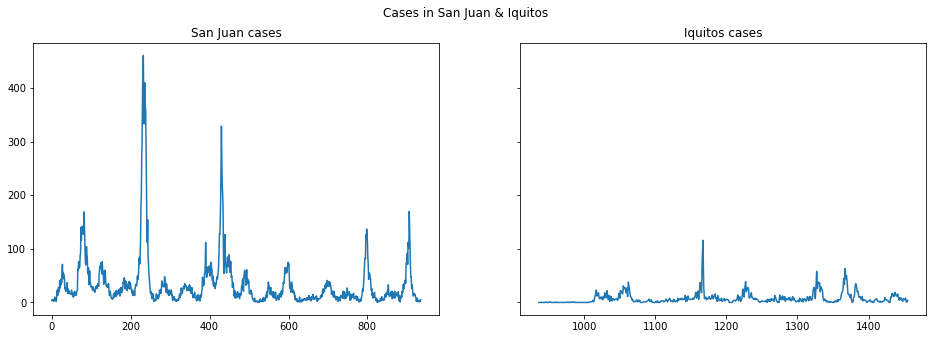

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True) #sharey to align the horizontal or vertical axis
fig.suptitle('Cases in San Juan & Iquitos')
fig.set_size_inches(16,5)
ax = sj['total_cases'].plot(ax=ax1);
ax1.set_title('San Juan cases')
ax = iq['total_cases'].plot(ax=ax2);
ax2.set_title('Iquitos cases')

## Subplots of all the features of San Juan

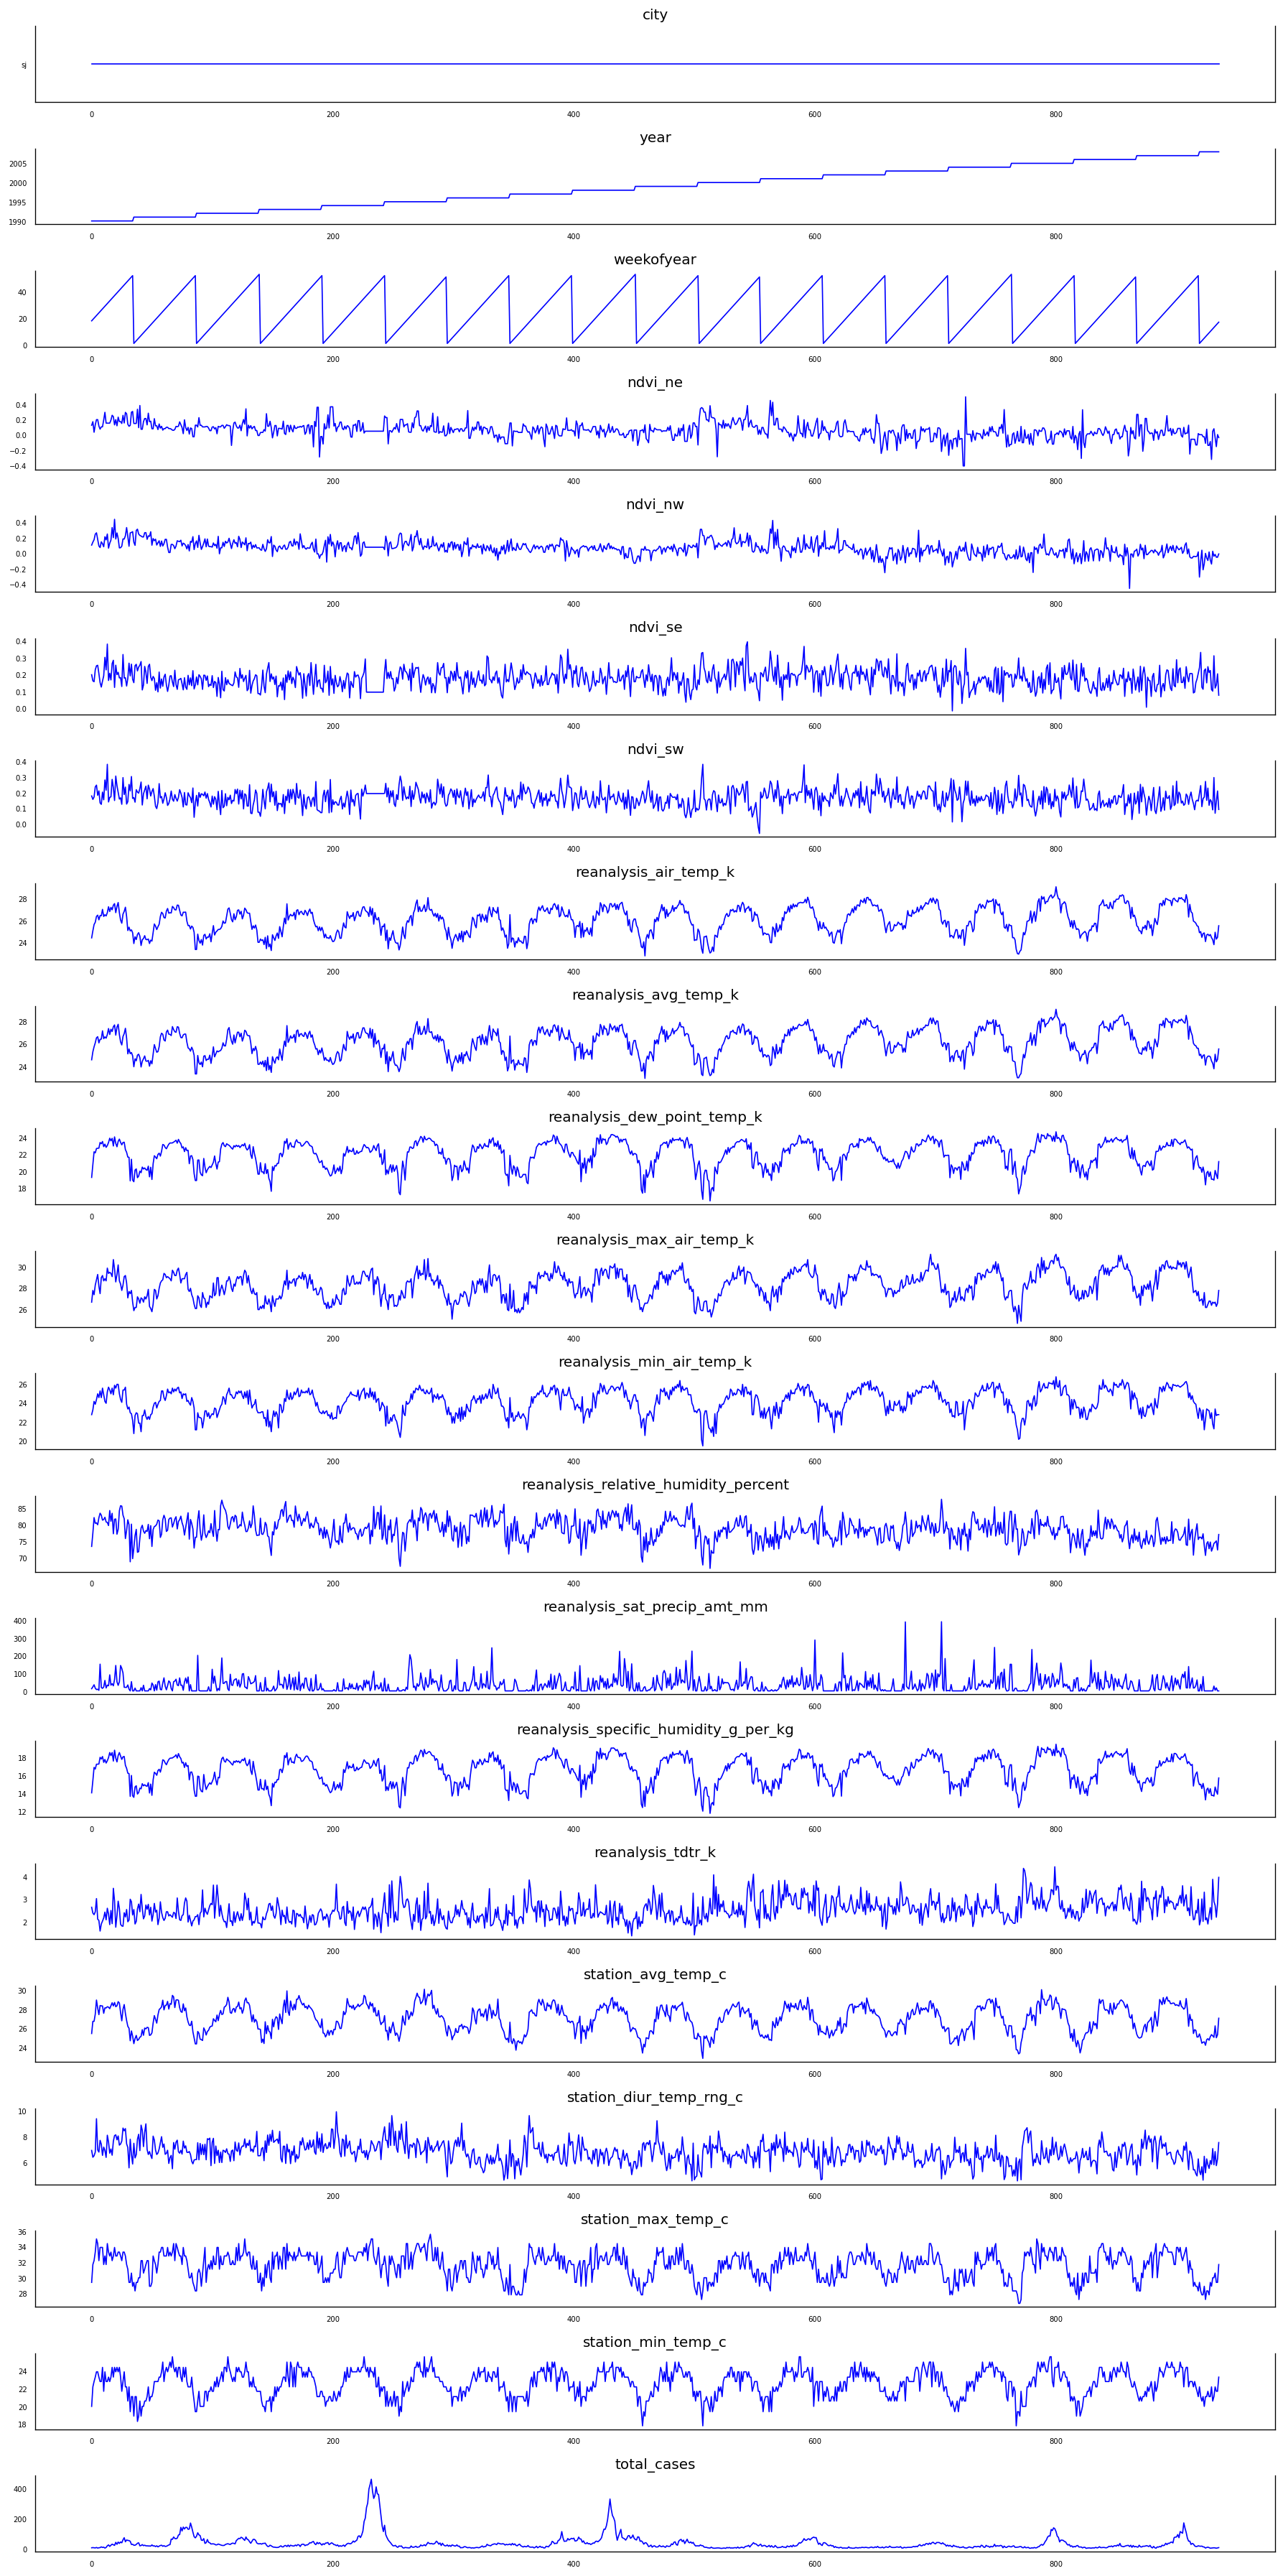

In [12]:
fig, axes = plt.subplots(nrows=21, ncols=1, dpi=120, figsize=(15,30))
for i, ax in enumerate(axes.flatten()):  #array is collapsed into 1-D
    data = sj[sj.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    ax.set_title(sj.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout() #adjust spacing between subplots to minimize the overlaps.

## Subplots of all the features of Iquitos

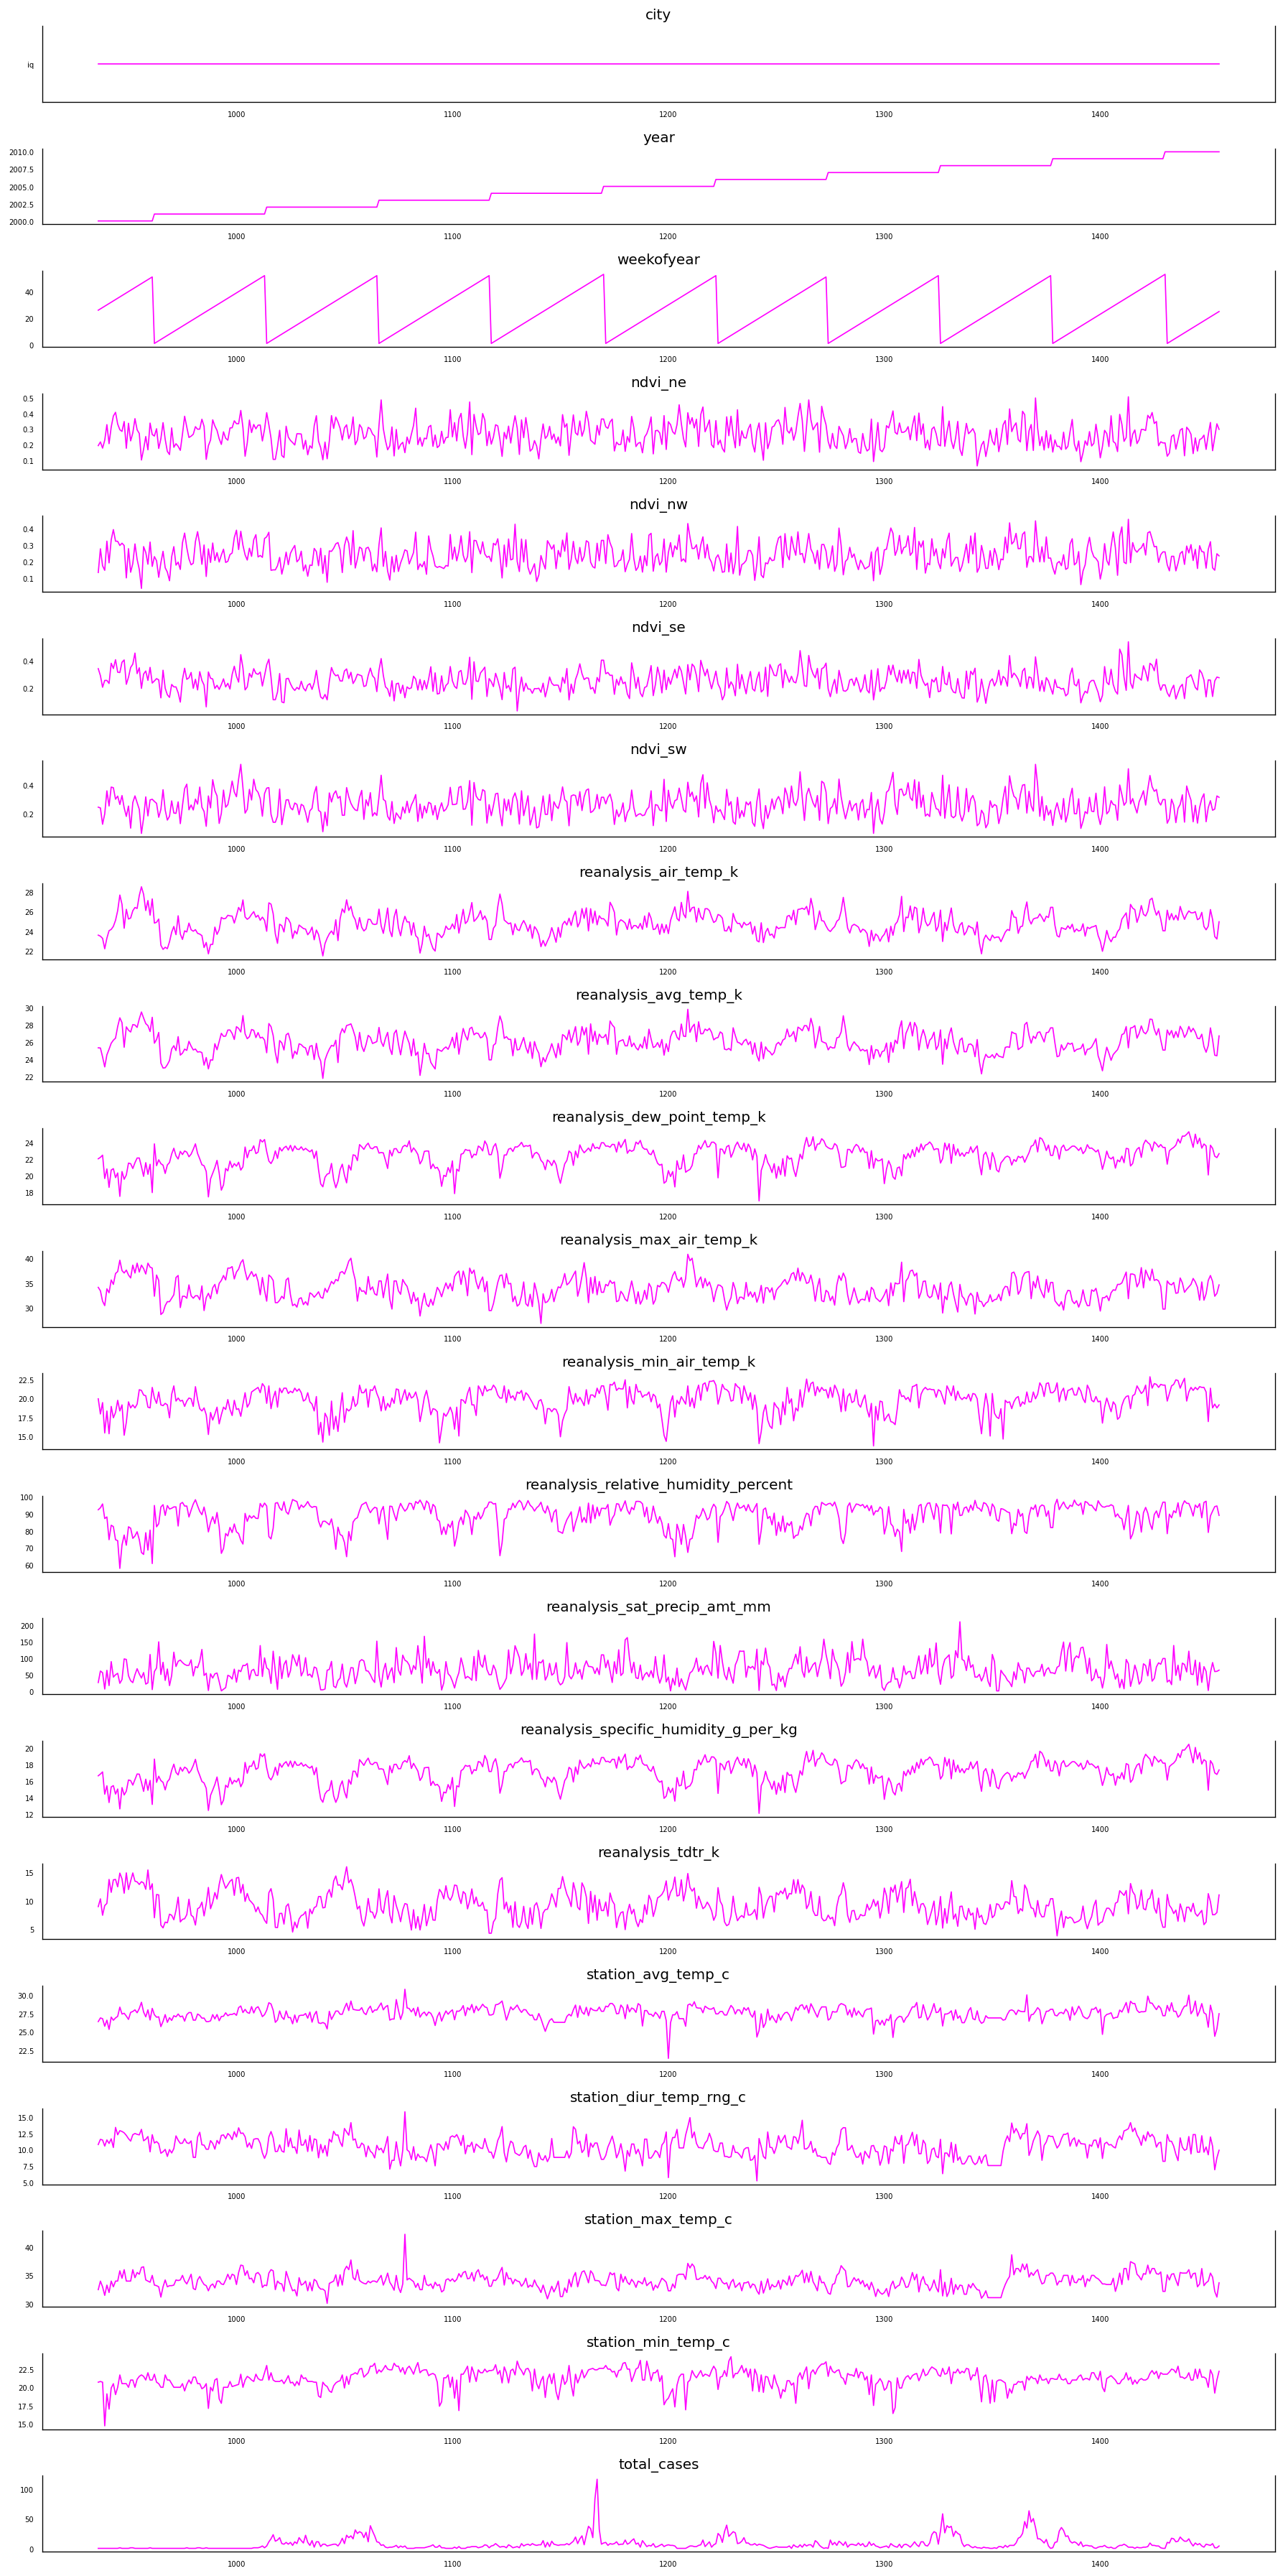

In [13]:
fig, axes = plt.subplots(nrows=21, ncols=1, dpi=120, figsize=(15,30))
for i, ax in enumerate(axes.flatten()):
    data = iq[iq.columns[i]]
    ax.plot(data, color='magenta', linewidth=1)
    
    ax.set_title(sj.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

### We lag the dataset of total cases by two weeks for the two cities

### Iquitos

In [14]:
iq.pop('city')

iq = iq.assign(Lag_by_1_Week=iq['total_cases'].shift(-1))
iq = iq.apply(lambda x: x.fillna(method='ffill'))
iq['Lag_by_1_Week'] = iq['Lag_by_1_Week'].astype(int)

In [15]:
iq = iq.assign(Lag_by_2_Weeks=iq['total_cases'].shift(-2))
iq = iq.apply(lambda x: x.fillna(method='ffill'))
iq['Lag_by_2_Weeks'] = iq['Lag_by_2_Weeks'].astype(int)

In [16]:
iq.head(10)

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,total_cases,Lag_by_1_Week,Lag_by_2_Weeks
936,2000,26,0.192886,0.132257,0.340886,0.247200,23.590000,25.300000,22.034286,34.15,...,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,0,0,0
937,2000,27,0.216833,0.276100,0.289457,0.241657,23.484286,25.278571,22.208571,33.45,...,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,0,0,0
938,2000,28,0.176757,0.173129,0.204114,0.128014,23.265714,24.242857,22.472857,31.35,...,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,0,0,0
939,2000,29,0.227729,0.145429,0.254200,0.200314,22.207143,23.078571,19.647143,30.45,...,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,0,0,0
940,2000,30,0.328643,0.322129,0.254371,0.361043,23.282857,24.485714,20.807143,33.85,...,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,0,0,0
941,2000,31,0.205529,0.190757,0.231671,0.255314,24.041429,25.135714,18.575714,33.05,...,16.24,13.421429,13.771429,25.340000,10.940000,32.0,17.0,0,0,0
942,2000,32,0.312486,0.329986,0.380586,0.387271,24.170000,25.828571,20.671429,35.65,...,89.37,15.311429,11.471429,27.016667,11.650000,34.0,19.9,0,0,0
943,2000,33,0.384133,0.392240,0.341780,0.382750,24.477143,26.185714,20.842857,34.75,...,42.08,15.465714,13.700000,26.583333,10.316667,33.0,20.5,0,0,0
944,2000,34,0.408157,0.322157,0.406714,0.302714,25.088571,26.421429,19.754286,36.95,...,49.22,14.444286,13.771429,26.900000,13.400000,34.0,19.0,0,0,1
945,2000,35,0.332043,0.321057,0.314614,0.324257,26.068571,27.778571,20.322857,37.35,...,53.65,15.057143,12.457143,27.116667,12.266667,34.0,20.0,0,1,0


### San Juan

In [17]:
sj.pop('city')

sj = sj.assign(Lag_by_1_Week=sj['total_cases'].shift(-1))
sj = sj.apply(lambda x: x.fillna(method='ffill'))
sj['Lag_by_1_Week'] = sj['Lag_by_1_Week'].astype(int)

In [18]:
sj = sj.assign(Lag_by_2_Weeks=sj['total_cases'].shift(-2))
sj = sj.apply(lambda x: x.fillna(method='ffill'))
sj['Lag_by_2_Weeks'] = sj['Lag_by_2_Weeks'].astype(int)

In [19]:
sj.head(10)

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,total_cases,Lag_by_1_Week,Lag_by_2_Weeks
0,1990,18,0.122600,0.103725,0.198483,0.177617,24.422857,24.592857,19.264286,26.65,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,4,5,4
1,1990,19,0.169900,0.142175,0.162357,0.155486,25.061429,25.292857,20.801429,27.75,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,5,4,3
2,1990,20,0.032250,0.172967,0.157200,0.170843,25.631429,25.728571,22.284286,27.35,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,4,3,6
3,1990,21,0.128633,0.245067,0.227557,0.235886,25.837143,26.078571,22.160000,28.25,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,3,6,2
4,1990,22,0.196200,0.262200,0.251200,0.247340,26.368571,26.514286,22.671429,28.75,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,6,2,4
5,1990,23,0.196200,0.174850,0.254314,0.181743,26.480000,26.614286,22.701429,29.25,...,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,2,4,5
6,1990,24,0.112900,0.092800,0.205071,0.210271,26.057143,26.071429,22.715714,28.15,...,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,4,5,10
7,1990,25,0.072500,0.072500,0.151471,0.133029,26.441429,26.378571,23.381429,27.45,...,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,5,10,6
8,1990,26,0.102450,0.146175,0.125571,0.123600,26.428571,26.407143,23.228571,28.95,...,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,10,6,8
9,1990,27,0.102450,0.121550,0.160683,0.202567,27.004286,27.128571,23.501429,29.15,...,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,6,8,2


## Splitting into testing and training sets

In [20]:
IQ_X=iq.iloc[:,:-3]     #all columns except last 
IQ_Y=iq.iloc[:,-2:-1]   # only last 

In [21]:
IQ_Y

,Lag_by_1_Week
936,0
937,0
938,0
939,0
940,0
...,...
1451,8
1452,1
1453,1
1454,4


In [22]:
from sklearn.model_selection import train_test_split #split test:train 30:70

IQ_X_Train, IQ_X_Test, IQ_Y_Train, IQ_Y_Test = train_test_split(IQ_X, IQ_Y, test_size = 0.3)

In [23]:
IQ_X_Train

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c
1134,2004,17,0.374286,0.330800,0.234033,0.254943,24.630000,25.364286,23.621429,30.85,20.75,94.788571,113.62,18.408571,6.000000,28.000000,10.650000,34.5,22.5
1258,2006,36,0.227786,0.283314,0.244371,0.283414,26.115714,27.200000,20.752857,37.15,17.05,75.530000,90.33,15.457143,13.728571,27.420000,12.000000,34.1,20.6
985,2001,24,0.317083,0.298967,0.219871,0.217343,22.332857,23.285714,21.191429,29.45,18.75,94.017143,47.13,15.782857,7.271429,26.880000,10.680000,33.4,20.0
940,2000,30,0.328643,0.322129,0.254371,0.361043,23.282857,24.485714,20.807143,33.85,18.35,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1
1329,2008,4,0.277971,0.324929,0.221914,0.295671,24.057143,25.192857,23.100000,31.65,21.65,95.125714,102.59,17.840000,5.971429,27.433333,9.466667,31.3,21.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,2009,23,0.114000,0.092443,0.097471,0.126286,22.975714,23.628571,22.117143,29.35,19.65,95.507143,42.22,16.757143,6.071429,28.100000,11.800000,34.0,22.2
1111,2003,46,0.317686,0.324600,0.249800,0.324471,25.217143,27.021429,22.495714,35.25,17.75,86.755714,31.08,17.292857,10.628571,28.500000,10.850000,35.5,20.8
1243,2006,21,0.206514,0.117143,0.169271,0.170071,24.842857,25.964286,20.627143,34.55,15.65,80.385714,91.40,15.460000,10.885714,27.466667,10.433333,34.0,21.7
1130,2004,13,0.306283,0.198720,0.029880,0.290150,24.162857,25.050000,23.457143,30.35,20.85,96.238571,120.10,18.237143,5.714286,28.650000,9.300000,34.0,23.6


#### We standardise the dataset

In [24]:
#Importing the StandardScalar class from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

#Instansiating a StandardScaler object
scaler = StandardScaler()

#Scaling ONLY the training data first
scaler.fit(IQ_X_Train)

StandardScaler()

In [25]:
IQ_X_Train = scaler.transform(IQ_X_Train)
IQ_X_Test = scaler.transform(IQ_X_Test)

## Random Forest Implementation in Iquitos

Random Forest algorithm is a supervised classification algorithm. We create a forest and randomise it. There is a direct relationship between the number of trees in the forest and the results it can get. So, the larger the number of trees, the more accurate the result.

Overfitting is one critical problem that may make the results worse, but for Random Forest algorithm, if there are enough trees in the forest, the classifier won’t overfit the model. Overfitting occurs when the model learns the data inputs given but it wont work well with an additional datset. Another advantage is the classifier of Random Forest can handle missing values (NaN), and it can be modeled for categorical values.

max_depth is max distance between root and leaf and we set it as 8.
random_state prevents variation in results for each run

In [26]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=8, random_state=42)
regr.fit(IQ_X_Train, IQ_Y_Train)

RandomForestRegressor(max_depth=8, random_state=42)

In [27]:
IQ_Predicted=regr.predict(IQ_X_Test)

In [28]:
IQ_Predicted

array([11.48473993,  4.73161107, 13.2946329 , 13.97727219,  0.15650937,
       24.66338274,  5.67483377,  7.06311458, 11.65927156,  5.75192167,
        6.80079903,  0.29244032,  2.92019599,  9.87161638,  4.5976687 ,
        4.03770316,  5.32504318,  4.58512625,  5.51326759,  1.49382114,
        9.00121656, 13.47761772,  4.91478238,  7.19381638,  7.43952429,
       36.97247936,  4.28838707,  3.59612319,  2.92363955, 15.83784565,
       12.09231456,  8.96702907,  4.86412232,  2.19900078,  7.29458202,
       11.15478124,  6.22037537, 11.5005969 , 13.69599488,  5.75586961,
        8.74673624,  4.79311147,  4.48884726,  9.1800235 ,  0.34509339,
        9.60634166,  3.56755305,  3.78609574, 11.22546822, 11.95282988,
        5.83016304, 17.60260761,  4.70258931, 10.96617486,  8.83334467,
        5.44066133, 10.02825443, 20.02273109, 11.54955439,  2.45904824,
        9.84357381,  8.12288934, 11.58919951,  3.78917163, 11.76937125,
        7.79579409,  2.29326363,  8.50086961, 10.0483537 , 10.64

In [29]:
from sklearn.metrics import mean_absolute_error

IQ_result = mean_absolute_error(IQ_Y_Test, IQ_Predicted)

In [30]:
IQ_result

5.550212273291679

In [31]:
import math
IQ_result_MSE = math.sqrt(mean_absolute_error(IQ_Y_Test, IQ_Predicted))

IQ_result_MSE

2.3558888499442583

## Applying Gradient Boosting 

n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably.
min_samples_split is the minimum number of data points placed in a node before the node is split.
learning_rate determines the contribution by each tree
loss is set to lad which is Least Absolute Deviations and it basically minimises the Sum od Absolute Errors

In [32]:
from sklearn import ensemble
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'lad'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(IQ_X_Train, IQ_Y_Train)
IQ_Predicted_Gradient_Boosting = clf.predict(IQ_X_Test)

IQ_result_MSE_Gradient_Boosting = math.sqrt(mean_squared_error(IQ_Y_Test, IQ_Predicted_Gradient_Boosting))

IQ_result_MSE_Gradient_Boosting

8.950392469080693

In [33]:
IQ_result_MAE_Gradient_Boosting = mean_absolute_error(IQ_Y_Test, IQ_Predicted_Gradient_Boosting)

IQ_result_MAE_Gradient_Boosting

4.574064015886825

# Splitting for San Juan

In [34]:
## Splitting the Train and Test data for San Juan

SJ_X=sj.iloc[:,:-3]
SJ_Y=sj.iloc[:,-1:]


SJ_X_Train, SJ_X_Test, SJ_Y_Train, SJ_Y_Test = train_test_split(SJ_X, SJ_Y, test_size = 0.3)

#Instansiating a StandardScaler object
scaler = StandardScaler()

#Scaling ONLY the training data first
scaler.fit(SJ_X_Train)

SJ_X_Train = scaler.transform(SJ_X_Train)
SJ_X_Test = scaler.transform(SJ_X_Test)

In [35]:
SJ_Y

,Lag_by_2_Weeks
0,4
1,3
2,6
3,2
4,4
...,...
931,1
932,3
933,5
934,5


## Random Forest 

In [36]:
## Random Forest for SJ-1

regr = RandomForestRegressor(max_depth=9, random_state=42)
regr.fit(SJ_X_Train, SJ_Y_Train)

SJ_Predicted=regr.predict(SJ_X_Test)

SJ_result_MAE = mean_absolute_error(SJ_Y_Test, SJ_Predicted)

from sklearn.metrics import mean_squared_error
import math

SJ_result_MSE = math.sqrt(mean_squared_error(SJ_Y_Test, SJ_Predicted))

SJ_result_MAE, SJ_result_MSE

(15.590701236219926, 24.87911020739667)

## Gradient Boosting 

In [37]:
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 3,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(SJ_X_Train, SJ_Y_Train)
SJ_Predicted_Gradient_Boosting = clf.predict(SJ_X_Test)

SJ_result_MSE_Gradient_Boosting = math.sqrt(mean_squared_error(SJ_Y_Test, SJ_Predicted_Gradient_Boosting))
SJ_result_MAE_Gradient_Boosting = mean_absolute_error(SJ_Y_Test, SJ_Predicted_Gradient_Boosting)

SJ_result_MAE_Gradient_Boosting, SJ_result_MSE_Gradient_Boosting

(13.55605201612377, 20.644334768291362)

## A plot between the actual and predicted values for San Juan

<Figure size 432x288 with 0 Axes>

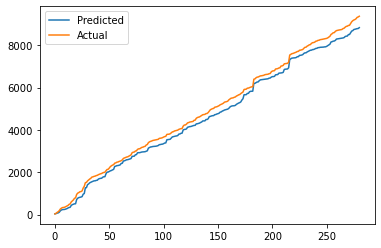

In [38]:
import numpy as np
SJ_Y_Test_np_array = np.array(SJ_Y_Test) 
SJ_Y_Predicted_np_array = np.array(SJ_Predicted_Gradient_Boosting) 
df = pd.DataFrame(SJ_Y_Test_np_array,columns=['Predicted'])
df1 = df.cumsum()

df = pd.DataFrame(SJ_Y_Predicted_np_array, columns=['Actual'])

df2 = df.cumsum()
plt.figure();

ax=df1.plot();
df2.plot(ax=ax);
plt.show();

## A plot between the actual and predicted values for Iquitos

<Figure size 432x288 with 0 Axes>

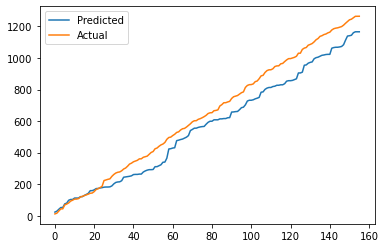

In [39]:
import numpy as np
IQ_Y_Test_np_array = np.array(IQ_Y_Test) 
IQ_Y_Predicted_np_array = np.array(IQ_Predicted) 
df = pd.DataFrame(IQ_Y_Test_np_array,columns=['Predicted'])
df1 = df.cumsum()

df = pd.DataFrame(IQ_Y_Predicted_np_array, columns=['Actual'])

df2 = df.cumsum()
plt.figure();

ax=df1.plot();
df2.plot(ax=ax);
plt.show();

## A plot to find the features in the dataset which are important and contribute to the regression model

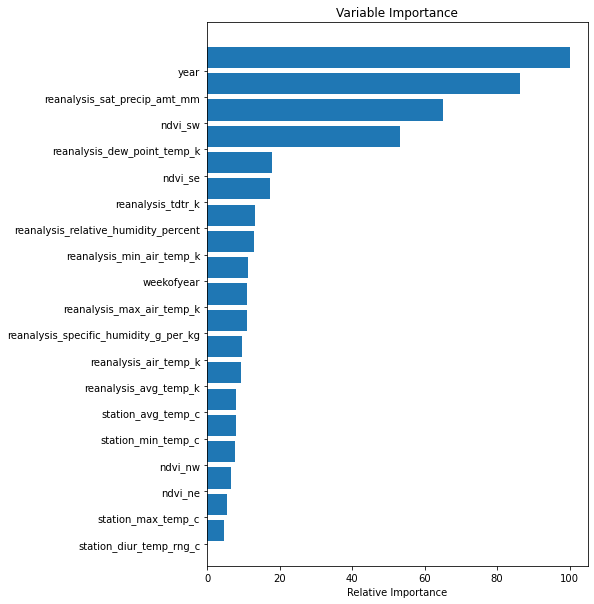

In [40]:
import numpy as np
features = list(IQ_X.columns.values)
plt.figure(figsize=(15, 10))
feature_importance = regr.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(sorted_idx, features)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Normalized Difference Vegetation Index (NDVI) measurements of the north-west part of the city is the feature that affects the model the most in comparison with the rest. So, it can be inferred that vegetation does have on impact on the spread of dengue.